<a href="https://colab.research.google.com/github/jha-vineet69/Sales-Forecasting-and-EDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTING LIBRARIES

In [1]:
#Keep Things Cleaner
import warnings
warnings.filterwarnings("ignore")


#Working with Data
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#General Utility
import os
import time
import datetime as dt

#Fav Styling Options
#Option 1:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
#Option 2:
#plt.style.use('fivethirtyeight')
#Option 3:
#plt.style.use('ggplot')

### DATA CLEANING

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jha-vineet69/Sales-Forecasting-and-EDA/master/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '')

In [4]:
df.set_index('OrderID', inplace=True)

In [5]:
del df['RowID']

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, CA-2017-152156 to CA-2016-128608
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderDate     9799 non-null   object 
 1   ShipDate      9799 non-null   object 
 2   ShipMode      9799 non-null   object 
 3   CustomerID    9799 non-null   object 
 4   CustomerName  9799 non-null   object 
 5   Segment       9799 non-null   object 
 6   Country       9799 non-null   object 
 7   City          9799 non-null   object 
 8   State         9799 non-null   object 
 9   PostalCode    9788 non-null   float64
 10  Region        9799 non-null   object 
 11  ProductID     9799 non-null   object 
 12  Category      9799 non-null   object 
 13  SubCategory   9799 non-null   object 
 14  ProductName   9799 non-null   object 
 15  Sales         9799 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.3+ MB


In [9]:
df[df['PostalCode'].isnull()==True]

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [10]:
df['PostalCode'] = df['PostalCode'].astype('str')

In [11]:
df['PostalCode'] = df['PostalCode'].fillna('05401.0')

In [12]:
df['PostalCode'] = [item[:-2] for item in df['PostalCode']]
df.head()

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, CA-2017-152156 to CA-2016-128608
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderDate     9799 non-null   object 
 1   ShipDate      9799 non-null   object 
 2   ShipMode      9799 non-null   object 
 3   CustomerID    9799 non-null   object 
 4   CustomerName  9799 non-null   object 
 5   Segment       9799 non-null   object 
 6   Country       9799 non-null   object 
 7   City          9799 non-null   object 
 8   State         9799 non-null   object 
 9   PostalCode    9799 non-null   object 
 10  Region        9799 non-null   object 
 11  ProductID     9799 non-null   object 
 12  Category      9799 non-null   object 
 13  SubCategory   9799 non-null   object 
 14  ProductName   9799 non-null   object 
 15  Sales         9799 non-null   float64
dtypes: float64(1), object(15)
memory usage: 1.3+ MB


In [14]:
df['Sales'].describe()

count     9799.000000
mean       230.763895
std        626.683644
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: Sales, dtype: float64

In [15]:
df['OrderDate'] = df['OrderDate'].astype('datetime64[ns]')
df['ShipDate'] = df['ShipDate'].astype('datetime64[ns]')

In [16]:
df.head()

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, CA-2017-152156 to CA-2016-128608
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderDate     9799 non-null   datetime64[ns]
 1   ShipDate      9799 non-null   datetime64[ns]
 2   ShipMode      9799 non-null   object        
 3   CustomerID    9799 non-null   object        
 4   CustomerName  9799 non-null   object        
 5   Segment       9799 non-null   object        
 6   Country       9799 non-null   object        
 7   City          9799 non-null   object        
 8   State         9799 non-null   object        
 9   PostalCode    9799 non-null   object        
 10  Region        9799 non-null   object        
 11  ProductID     9799 non-null   object        
 12  Category      9799 non-null   object        
 13  SubCategory   9799 non-null   object        
 14  ProductName   9799 non-null   object        
 15  Sales         9799 n

In [18]:
df.to_csv('SalesCleaned.csv')

### EXPLORATORY DATA ANALYSIS

In [19]:
df['Sales'].describe()

count     9799.000000
mean       230.763895
std        626.683644
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: Sales, dtype: float64

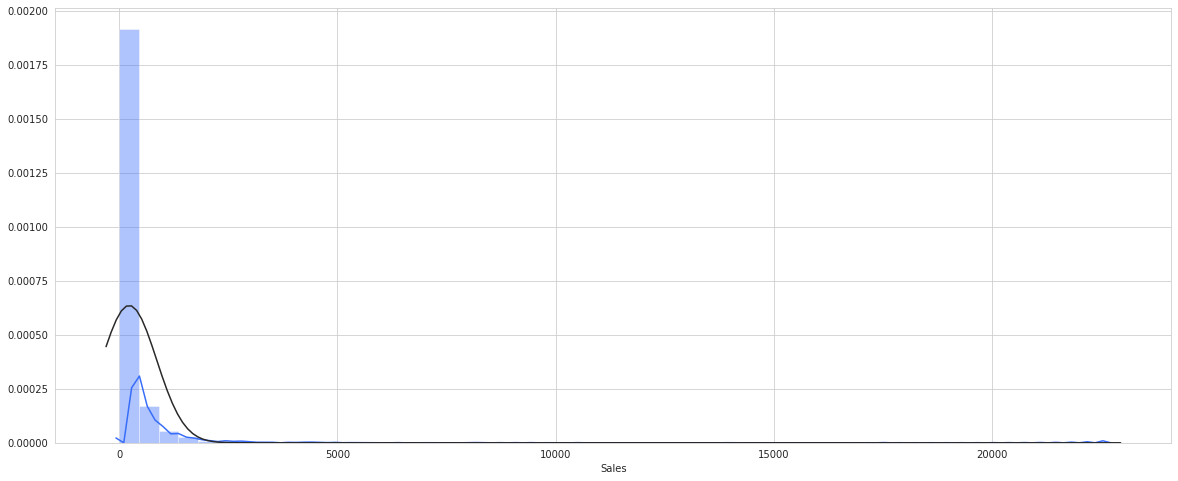

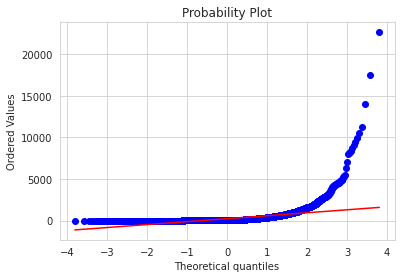

In [20]:
# Histogram and normal probability plot
plt.figure(figsize=(20,8))
sns.distplot(df['Sales'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sales'], plot=plt)

In [21]:
# Compute skewness and kurtosis
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.982858
Kurtosis: 304.414569


In [22]:
SalesVal = np.log(df['Sales']+1)

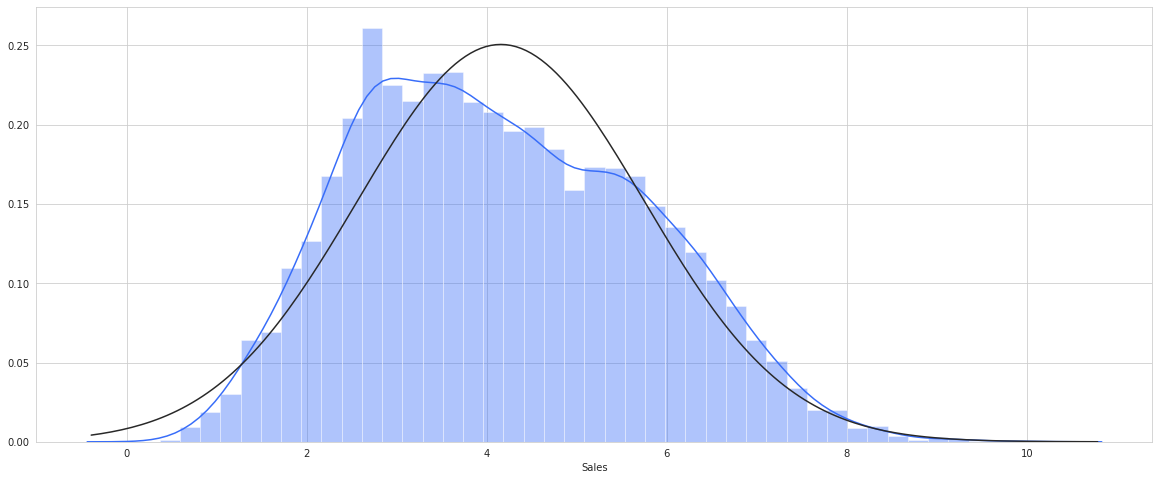

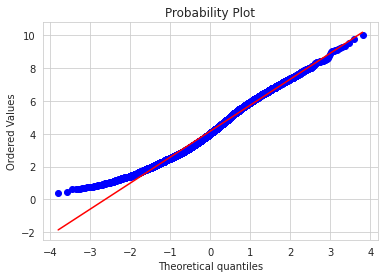

In [23]:
# Histogram and normal probability plot
plt.figure(figsize=(20,8))
sns.distplot(SalesVal, fit=norm);
fig = plt.figure()
res = stats.probplot(SalesVal, plot=plt)

In [24]:
SalesVal.describe()

count    9799.000000
mean        4.157381
std         1.592081
min         0.367417
25%         2.904055
50%         4.016023
75%         5.354565
max        10.027451
Name: Sales, dtype: float64

In [25]:
# Compute skewness and kurtosis
print("Skewness: %f" % SalesVal.skew())
print("Kurtosis: %f" % SalesVal.kurt())

Skewness: 0.281311
Kurtosis: -0.586363


In [26]:
df.groupby(["Category", "SubCategory"])["SubCategory"].count()

Category         SubCategory
Furniture        Bookcases       226
                 Chairs          606
                 Furnishings     931
                 Tables          314
Office Supplies  Appliances      459
                 Art             785
                 Binders        1492
                 Envelopes       248
                 Fasteners       214
                 Labels          357
                 Paper          1338
                 Storage         832
                 Supplies        184
Technology       Accessories     756
                 Copiers          66
                 Machines        115
                 Phones          876
Name: SubCategory, dtype: int64

In [27]:
dataProduct = df.groupby(['ProductID']).sum()
dataProduct = dataProduct.loc[:,['Sales']]
dataProduct = dataProduct.sort_values(['Sales'], ascending = False).reset_index()

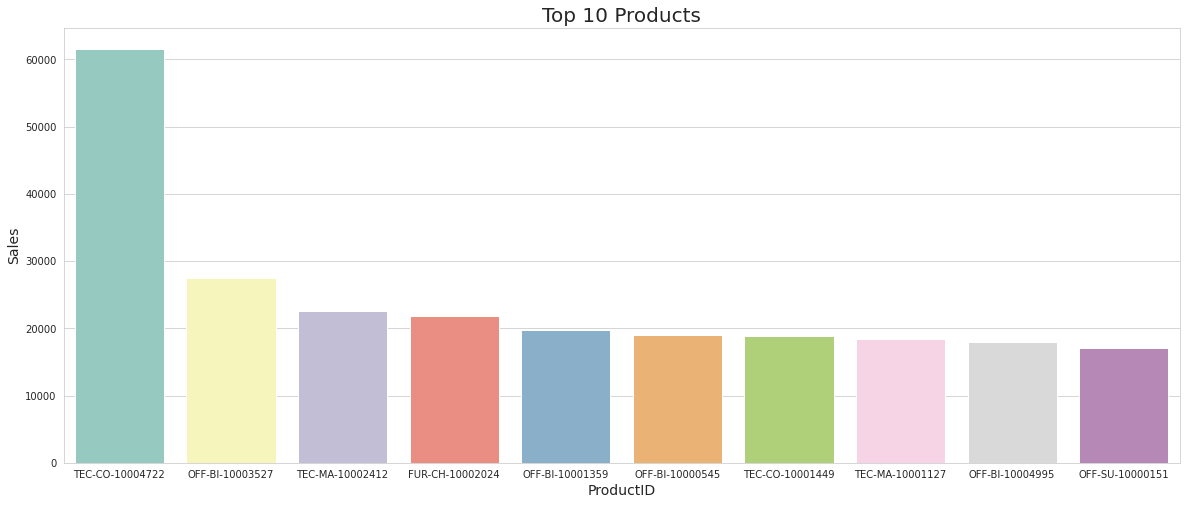

In [28]:
sns.set_palette("Set3", 10)
plt.figure(figsize=(20,8))
sns.barplot(x='ProductID', y='Sales', data=dataProduct.head(10));
plt.xlabel("ProductID", size=14)
plt.ylabel("Sales", size=14)
plt.title("Top 10 Products", size=20);

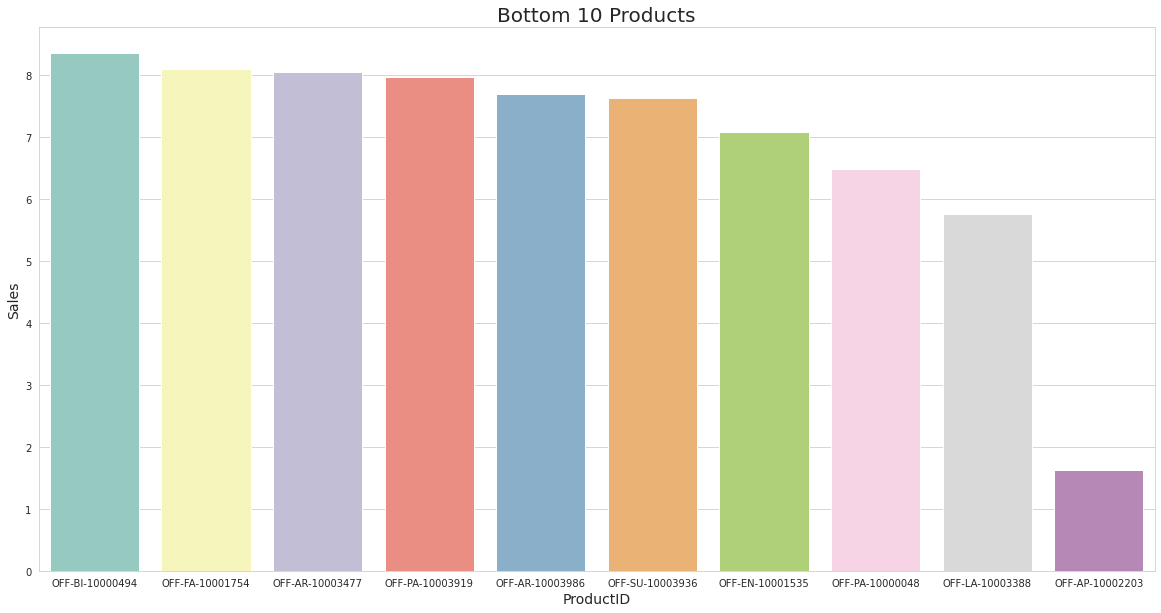

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='ProductID',y='Sales', data=dataProduct.tail(10));
plt.xlabel("ProductID", size=14)
plt.ylabel("Sales", size=14)
plt.title("Bottom 10 Products", size=20);

In [30]:
dataCustomers = df.groupby(['CustomerName']).sum()
dataCustomers = dataCustomers.loc[:,['Sales']]
dataCustomers = dataCustomers.sort_values(['Sales'], ascending = False).reset_index()

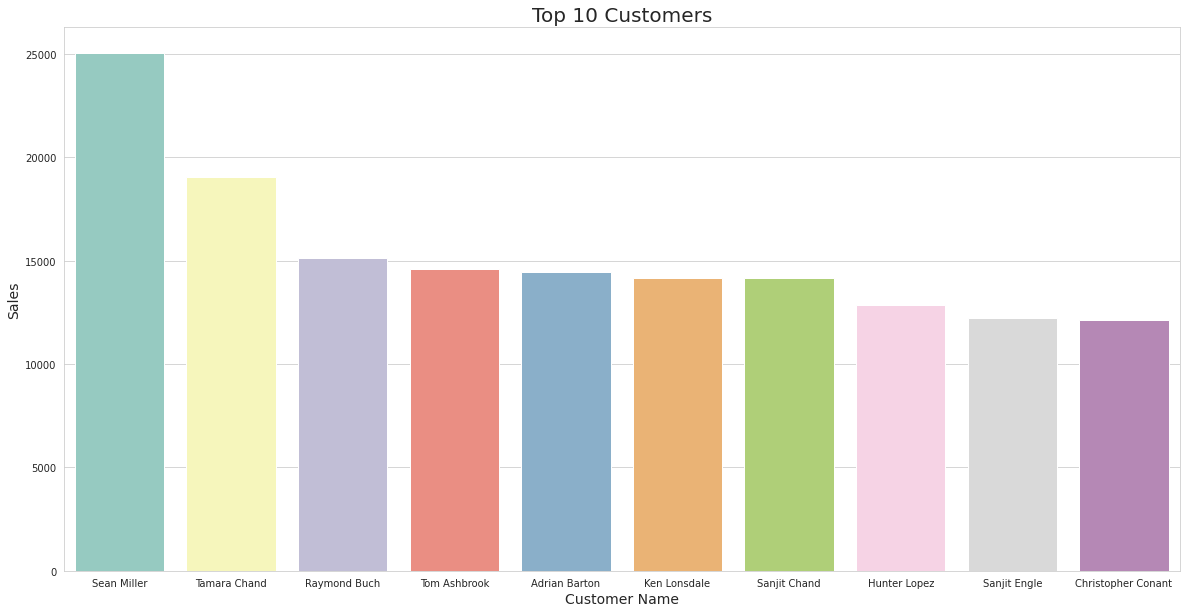

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='CustomerName',y='Sales', data=dataCustomers.head(10));
plt.xlabel("Customer Name", size=14)
plt.ylabel("Sales", size=14)
plt.title("Top 10 Customers", size=20);

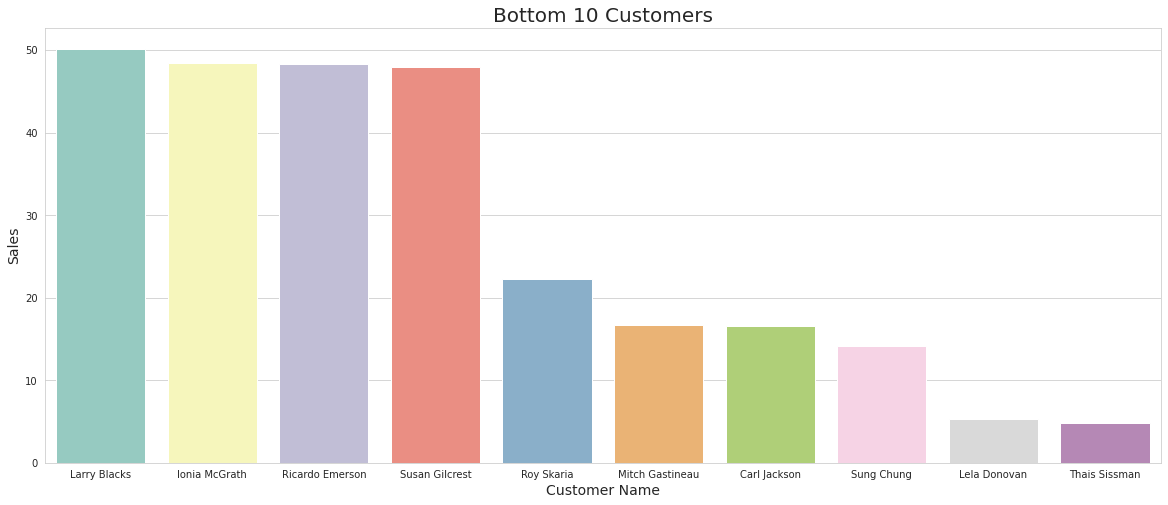

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(x='CustomerName',y='Sales', data=dataCustomers.tail(10));
plt.xlabel("Customer Name", size=14)
plt.ylabel("Sales", size=14)
plt.title("Bottom 10 Customers", size=20);

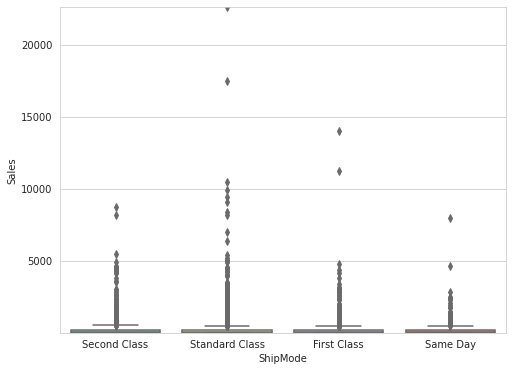

In [33]:
# Box plot ShipMode/Sales
data = pd.concat([df['Sales'], df.ShipMode], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="ShipMode", y="Sales", data=data)
fig.axis(ymin=df['Sales'].min(), ymax=df['Sales'].max());

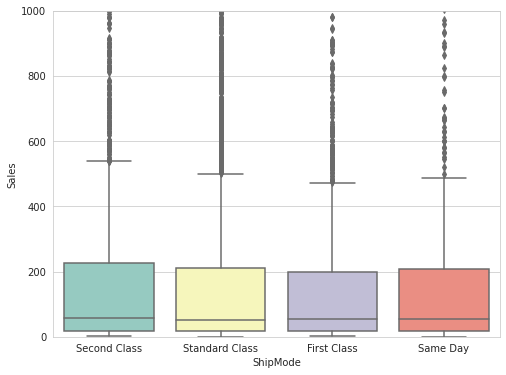

In [34]:
# Zoomed In Box plot ShipMode/Sales
data = pd.concat([df['Sales'], df.ShipMode], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="ShipMode", y="Sales", data=data)
fig.axis(ymin=0, ymax=1000);

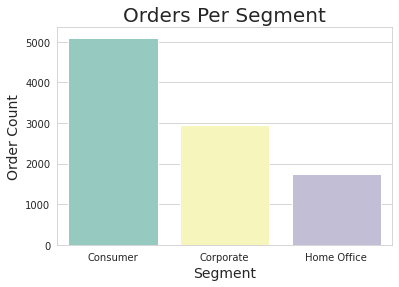

In [35]:
sns.countplot("Segment", data=df);
plt.xlabel("Segment", size=14)
plt.ylabel("Order Count", size=14)
plt.title("Orders Per Segment", size=20);

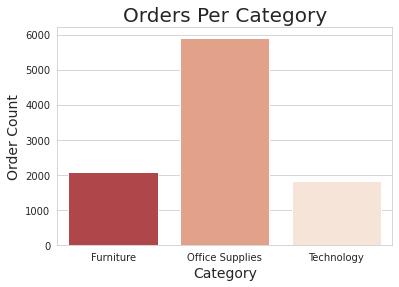

In [36]:
sns.set_palette('RdBu')
sns.countplot("Category", data=df);
plt.xlabel("Category", size=14)
plt.ylabel("Order Count", size=14)
plt.title("Orders Per Category", size=20);

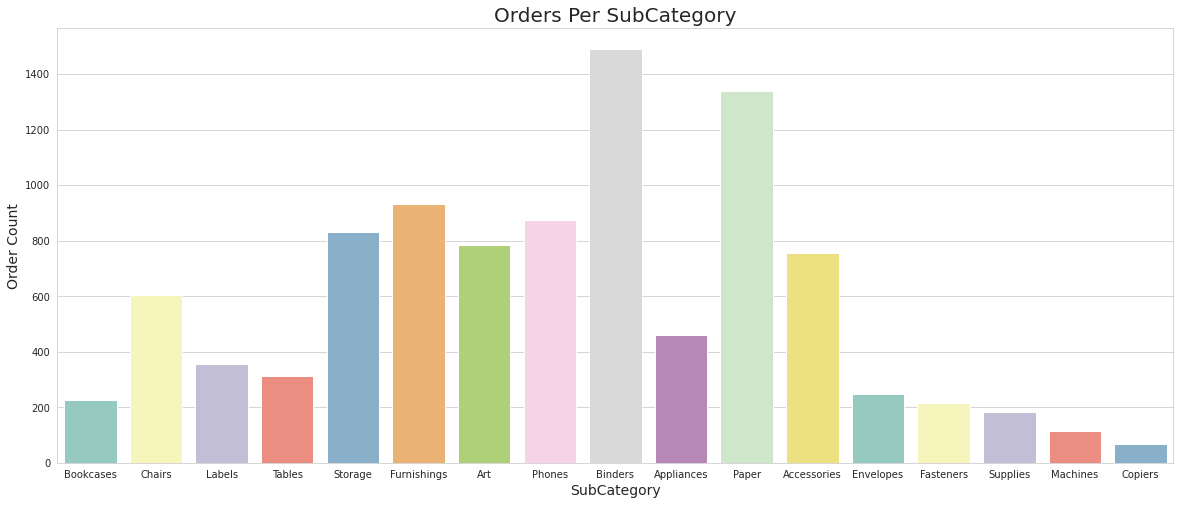

In [37]:
sns.set_palette("Set3", 20)
plt.figure(figsize=(20,8))
sns.countplot("SubCategory", data=df);
plt.xlabel("SubCategory", size=14)
plt.ylabel("Order Count", size=14)
plt.title("Orders Per SubCategory", size=20);

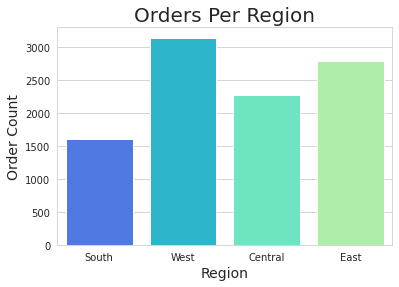

In [38]:
sns.set_palette('rainbow')
sns.countplot("Region", data=df);
plt.xlabel("Region", size=14)
plt.ylabel("Order Count", size=14)
plt.title("Orders Per Region", size=20);

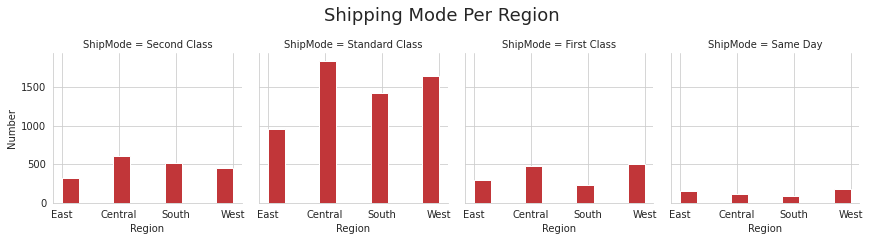

In [39]:
sns.set_palette('RdBu')
region_hist = sns.FacetGrid(df, col='ShipMode');
region_hist.map(plt.hist, 'Region')
region_hist.fig.suptitle("Shipping Mode Per Region", fontsize=18, y=1.1)
region_hist.set_ylabels('Number');

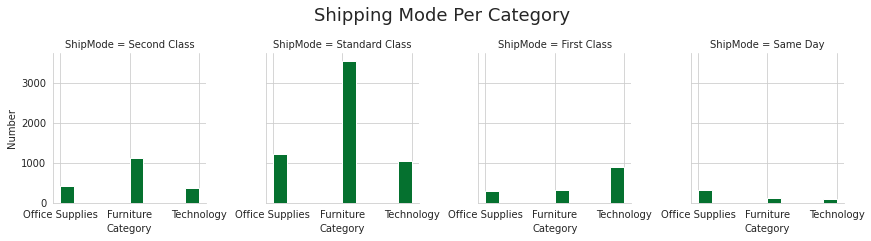

In [40]:
sns.set_palette('Greens_r')
category_hist = sns.FacetGrid(df, col='ShipMode');
category_hist.map(plt.hist, 'Category')
category_hist.fig.suptitle("Shipping Mode Per Category", fontsize=18, y=1.1)
category_hist.set_ylabels('Number');

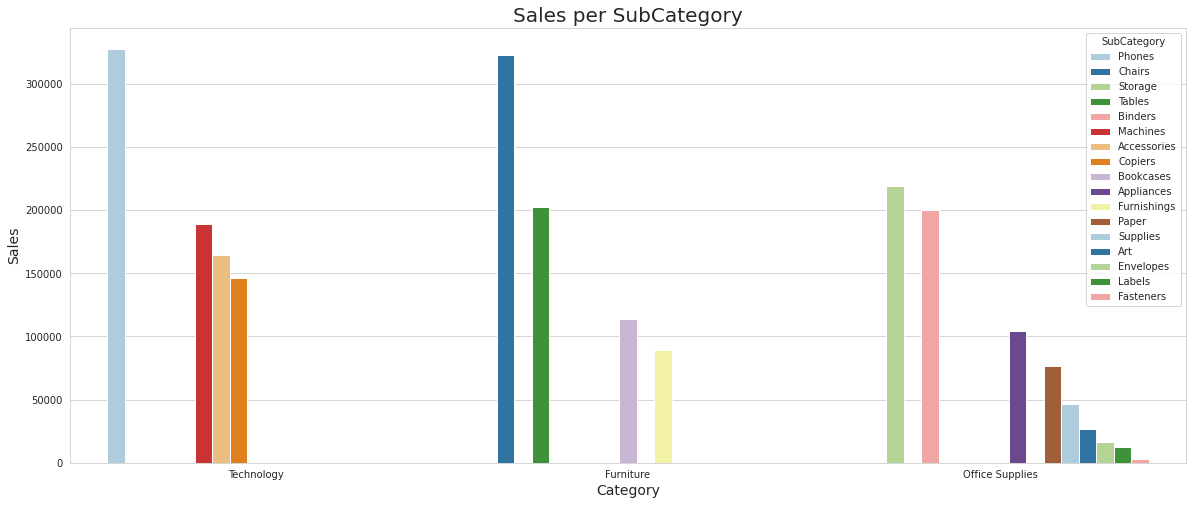

In [41]:
plt.figure(figsize=(20,8))
sale_category = df.groupby(["Category","SubCategory"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False)
sns.barplot(x = "Category", hue="SubCategory", y= "Sales", data=sale_category, palette = "Paired")
plt.xlabel("Category", size=14)
plt.ylabel("Sales", size=14)
plt.title("Sales per SubCategory", size=20);
plt.show()

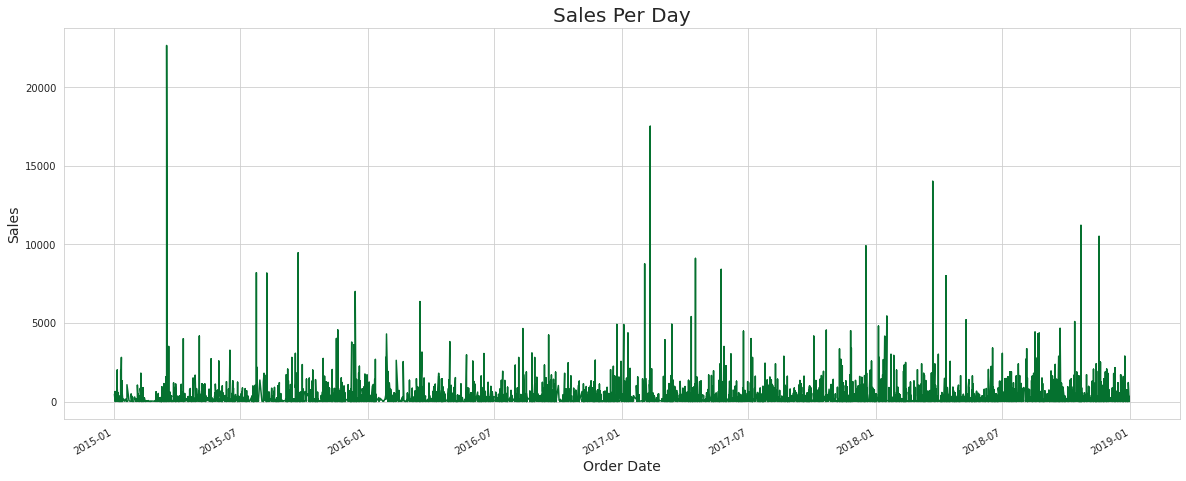

In [42]:
df2 = df.copy()
df2.set_index('OrderDate', inplace= True)
df2['Sales'].plot(x='OrderDate',figsize=(20,8))
plt.ylabel("Sales", size=14)
plt.xlabel("Order Date", size=14)
plt.title("Sales Per Day", size=20);
plt.show()

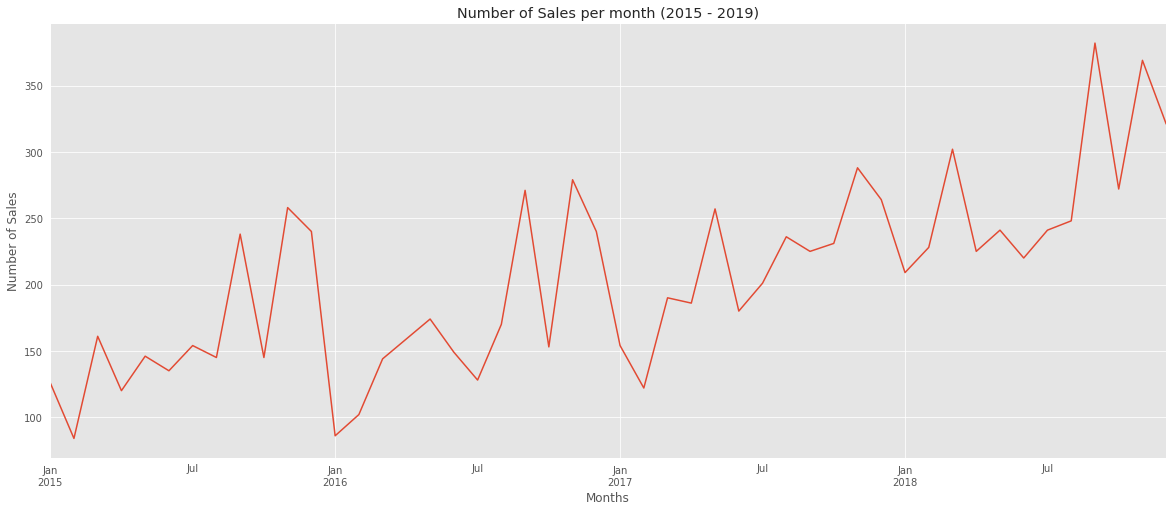

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
df2.resample('M').size().plot(legend=False)
plt.title('Number of Sales per month (2015 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of Sales')
plt.show()

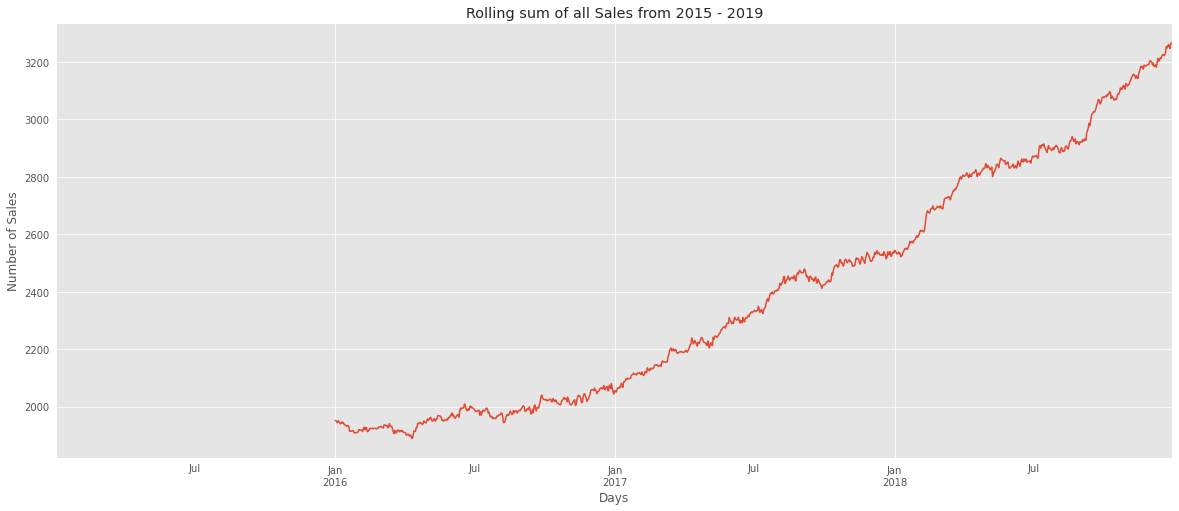

In [44]:
plt.figure(figsize=(20,8))
df2.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all Sales from 2015 - 2019')
plt.ylabel('Number of Sales')
plt.xlabel('Days')
plt.show()